# Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and Analysis

In [3]:
insurance_dataset = pd.read_csv('insurance.csv')

In [23]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_dataset.shape

(1338, 7)

C:\Users\user\AppData\Local\Temp\ipykernel_21892\1084923516.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


Text(0.5, 1.0, 'Age Distribution')

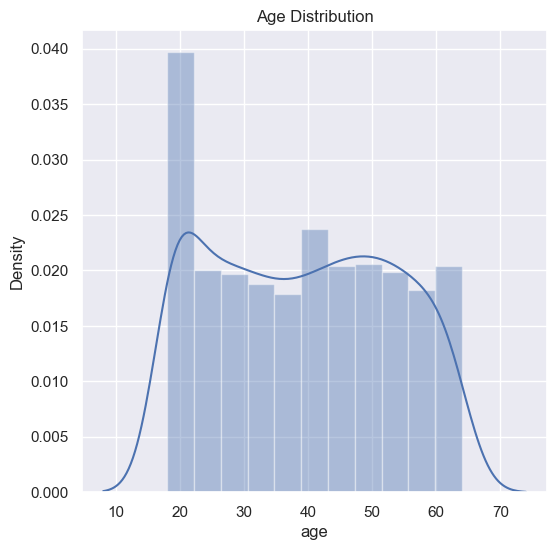

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')

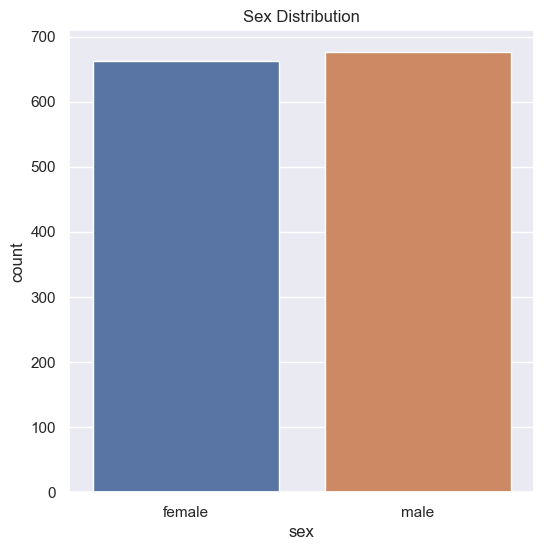

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_21892\1877054762.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


Text(0.5, 1.0, 'BMI Distribution')

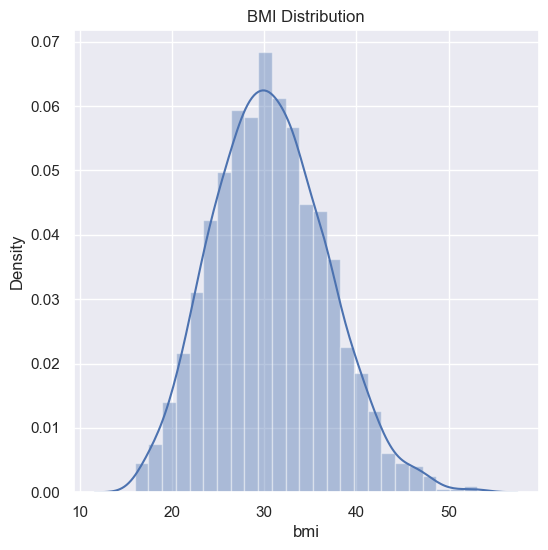

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')

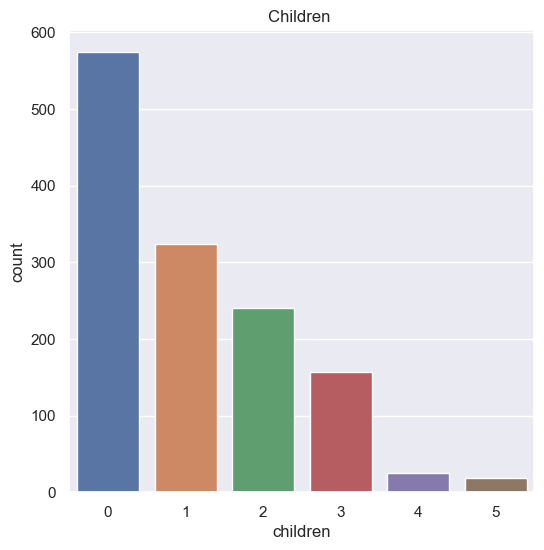

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data = insurance_dataset)
plt.title("Children ")
plt.show()

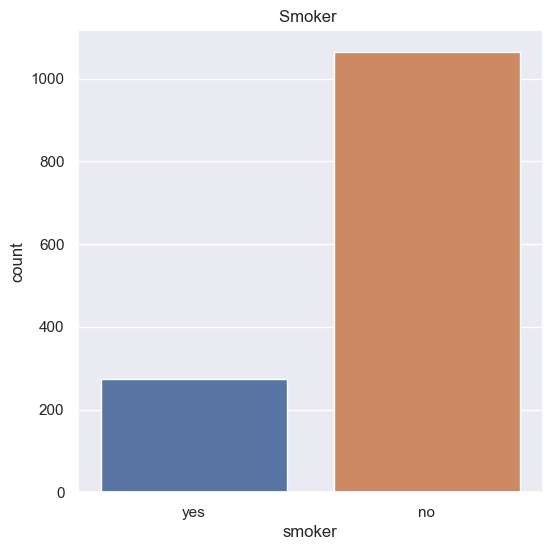

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data = insurance_dataset)
plt.title("Smoker ")
plt.show()

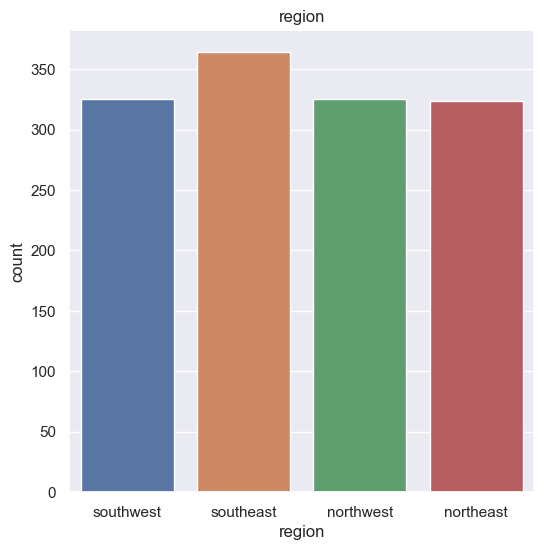

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data = insurance_dataset)
plt.title("region")
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_21892\2728662377.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


Text(0.5, 1.0, 'charge Distribution')

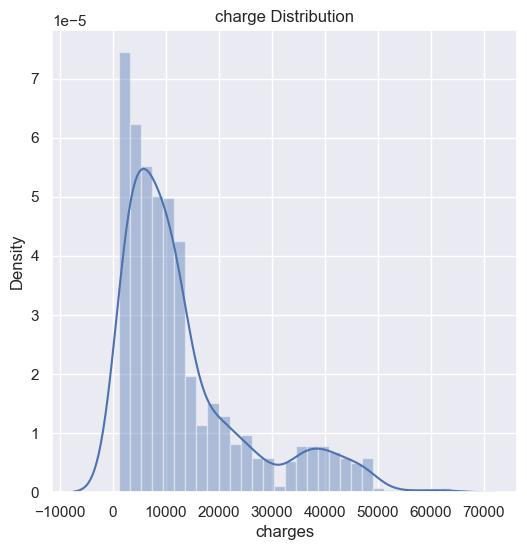

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charge Distribution')

# Label Encoding

In [22]:
# encoding Sex Column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace = True)

# Encoding Smoker Column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace = True)

#Encoding region Column
insurance_dataset.replace({
    'region':{
        'southeast':0,
        'southwest':1,
        'northwest':3,
        'northeast':2}},
    inplace = True)

In [24]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting Features and target 

In [30]:
X = insurance_dataset.drop(columns = 'charges',axis = 1)
Y = insurance_dataset['charges']

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [32]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

# Linear Regression

In [36]:
Regressor = LinearRegression()

In [37]:
Regressor.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [38]:
training_data_pred = Regressor.predict(X_train)

In [39]:
# R2
R2_train = metrics.r2_score(Y_train,training_data_pred)

print('R2 Score of model:',R2_train)

R2 Score of model: 0.751505643411174


In [40]:
test_data_pred = Regressor.predict(X_test)

In [41]:
# R2
R2_test = metrics.r2_score(Y_test,test_data_pred)

print('R2 Score of model:',R2_test)

R2 Score of model: 0.7447273869684077


# Building a Predictive System

In [44]:
input_data = (46,1,33.44,1,1,0)

input_data_as_array = np.asarray(input_data)

Reshaped_array = input_data_as_array.reshape(1,-1)

prediction = Regressor.predict(Reshaped_array)

print(prediction)

print('the insurance cost in USD',prediction[0])

[10657.40884992]
the insurance cost in USD 10657.408849921461


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
